In [21]:
# Basic precode setup of importing all the libraries, such as MatPlotlib for plotting, Seaborn to make it look nicer
# Numpy for the math tools as well as the widgets class from MatPlotLib for the slider tools
%matplotlib notebook
import matplotlib
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [22]:
# This is the x limit, so starting my x from 1 to 30, the reason i start from 1 is because with the equation if i put 0 it becomes undefined
x = np.linspace(0, 5 ,1000)

# This is a function to compute your equation 
#like f(x) = x^2 , so this equation used takes in x and outputs f based on the equation of the parachutist

# def equationf(x):
# 	g = 9.81
# 	m = 68.1
# 	t = 10
# 	v = 40
# 	f = ((g*m)/x)*(1-np.exp(-(x/m)*t))-v
# 	return f

# Another example equation f(x) = 3cos x + 5sin x , for sine, cosine, exponential you have to put np. Like np.cos(x), np.exp(x)
# def equationf(x):
#     f = 3*(np.cos(x)) +5*(np.sin(x))
#     return f

#Another one for f(X) = 3x^2 - 25x -2
# def equationf(x):
#     f = np.exp(x)*np.sin(x) -1
#     return f

# def derivative(x):
#     f = np.exp(x)*(np.sin(x) +np.cos(x))
#     return f

def equationf(x):
    f = np.exp(-x) - x
    return f

def derivative(x):
    f = 10*x**9 
    return f

###################
# starting value
back = 0;
initial = 1;
deltax = 0.01;
######################3



$$ \textbf{Newton- Raphson Method}$$

<IPython.core.display.Javascript object>


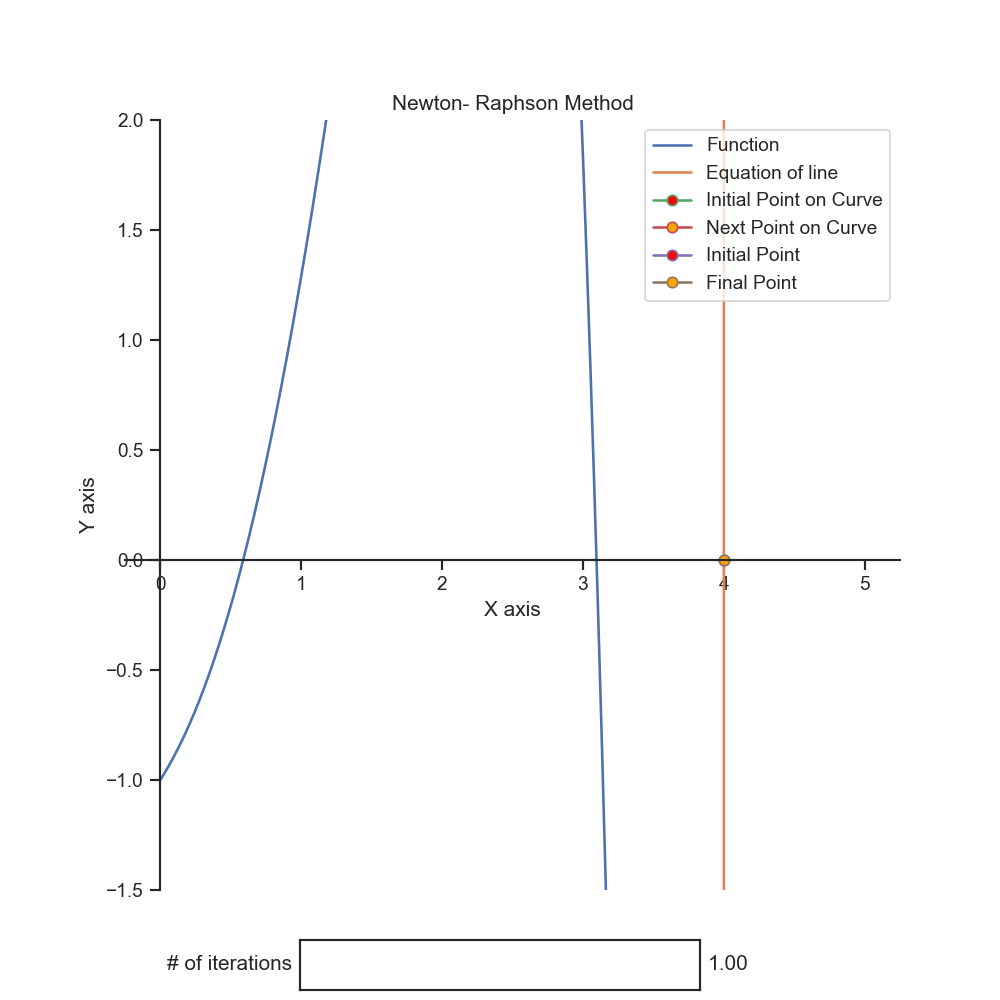

In [41]:



# Plotting settings
# Figure is the "window" of the plot, with size 8 and 8, what is the unit? idk i just change until its nice
fig= plt.figure(figsize=(8,8))

# ax or axes in matlab term is the "plot" or "image" in the figure, so you can have a figure with 8 plots called axes (different from axis)
ax = plt.subplot()

ax.set_ylim([-1.5,2])
#ax.set_xlim([0,2])
# Spines in matlab term pretty much means like "edge line" or "axis lines" of the plot, so like the "top line, bottom like etc"
#I made the top and right line invisible so we will only have 2 lines which will be the x and y axis
# i set the position of the line to be at 0,0 cuz origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Initial Val

initialval = initial

#This time i want to plot the equation of like so Y = mX + C , where m is gradient and C is y-intercept

# finding y1 so that i can use to find gradient
y1 = equationf(initialval)

# Finding the gradient here
m = derivative(initialval) # gradient

# Finds the Y-intercept C based on the equation (y1-y2) = m(x1-x2)
# So expanding that equation will get y1 -y2 = m*x1 - m*x2
# Since its y- intercept, x1 = 0
#  y1 = -m*x2 - y2

# Since formula for c from Y = mX + c when X =0 is C = Y
# Therefore C = y1 = -m*X2 - y2
# Math in programming

nextval = initialval - y1/m

C = -m*nextval

y = m*x + C # Equation of line

# Main Equation Line
line1, = plt.plot(x,equationf(x) ,label="Function")

# This plots the equation of line between the 2 points,
lineeqn, = plt.plot(x, y, label = "Equation of line")

# This plots the XL and Xu point but show them with respect to on the curve so you can see it better
initialpointoncurve,= plt.plot(initialval, equationf(initialval), label="Initial Point on Curve",marker='o', markerfacecolor='red', markersize=6)
nextpointoncurve, = plt.plot(nextval, equationf(nextval), label="Next Point on Curve",marker='o', markerfacecolor='orange', markersize=6)

# The usual 3 big boi points
firstpoint,= plt.plot(initialval, 0, label="Initial Point",marker='o', markerfacecolor='red', markersize=6)
nextpoint, = plt.plot(nextval, 0, label="Final Point", marker='o', markerfacecolor='orange', markersize=6)



# Labels the axis, title and show the legend
plt.title("Newton- Raphson Method")
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.legend()




# slider functionality
# This create the slider axe, (again remember that an axe is pretty much like a "plot" or "image" on a figure)
# The first 2 numbers are like the where the left and bottom part of the slider starts, so 0.1 and 0.01 so its pretty low
# the last 2 numer is the width and height of the slider
axSlider1 = plt.axes([0.3,0.01,0.4, 0.05])

# this line will turn the axe into an actual slider instead of a blank "plot" or image"
# If you want to icnrease the total number of iteration available change valmax
iterationSlider = Slider(axSlider1, "# of iterations", valmin = 1, valmax = 10, valinit = 1, valstep = 1)



# This is the function that the slider will use when you change the slider value, will be explained later
# What this function do is like what you read in the textbook the f(xl)*f(xu) < 0 and blah blah rule



def newPoint(val):
	iteration = int(iterationSlider.val)
	initialval = initial
	y1 = equationf(initialval)
	m = derivative(initialval)
	nextval = initialval - y1/m
	C = -m*nextval
	y = m*x + C 
    # Based on the # of iteration you choose, this will do the condition process n times
    # so if you choose 2 iterations, it does the calculation 2 times
	for i in range(1,iteration):

	    initialval = nextval
	    y1 = equationf(initialval)
	    m = derivative(initialval)
	    nextval = initialval - y1/m
	    C = -m*nextval
	    y = m*x + C 
    # Once everything is done, update the points with the new x values 
	firstpoint.set_xdata(initialval)
	nextpoint.set_xdata(nextval)

	# Same thing update the x and y values of the new points
	initialpointoncurve.set_xdata(initialval)
	initialpointoncurve.set_ydata(equationf(initialval))
	nextpointoncurve.set_xdata(nextval)
	nextpointoncurve.set_ydata(equationf(nextval))

	# Update the equation of line with the new equation
	lineeqn.set_ydata(y)
	# Redraw everything
	plt.draw()
    



# So iterationSlider is what i call my slider object, and the .on_changed() will be what the slider will do when it changed
# the format is like this   sliderName.on_changed(Functiontocall)
# Meaning when i change my slider values, so when it changes, it calls the function newPoint() that i did.
iterationSlider.on_changed(newPoint)

# Finally show all the things, plot, sliders, and etc
plt.show()


<IPython.core.display.Javascript object>


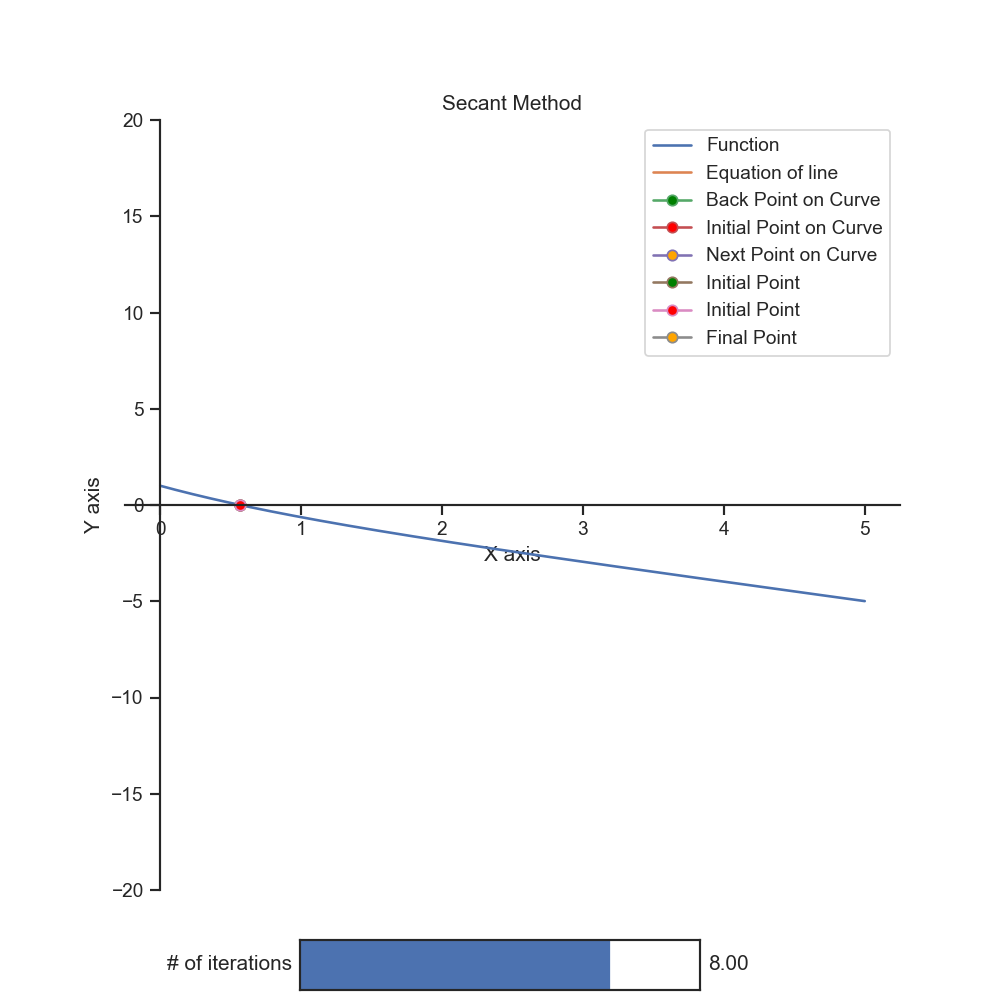

In [48]:



# Plotting settings
# Figure is the "window" of the plot, with size 8 and 8, what is the unit? idk i just change until its nice
fig= plt.figure(figsize=(8,8))

# ax or axes in matlab term is the "plot" or "image" in the figure, so you can have a figure with 8 plots called axes (different from axis)
ax = plt.subplot()

ax.set_ylim([-20,20])
# Spines in matlab term pretty much means like "edge line" or "axis lines" of the plot, so like the "top line, bottom like etc"
#I made the top and right line invisible so we will only have 2 lines which will be the x and y axis
# i set the position of the line to be at 0,0 cuz origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Initial Val

initialval = initial
backval = back

#This time i want to plot the equation of like so Y = mX + C , where m is gradient and C is y-intercept

# finding y1 so that i can use to find gradient
y0 = equationf(backval)
y1 = equationf(initialval)

newval = initial - (y1*(backval - initialval))/(y0-y1)

# Finding the gradient here
m = (y0-y1)/(backval-initialval) # gradient

# Finds the Y-intercept C based on the equation (y1-y2) = m(x1-x2)
# So expanding that equation will get y1 -y2 = m*x1 - m*x2
# Since its y- intercept, x1 = 0
#  y1 = -m*x2 - y2

# Since formula for c from Y = mX + c when X =0 is C = Y
# Therefore C = y1 = -m*X2 - y2
# Math in programming


C = -m*newval

y = m*x + C # Equation of line

# Main Equation Line
line1, = plt.plot(x,equationf(x) ,label="Function")

# This plots the equation of line between the 2 points,
lineeqn, = plt.plot(x, y, label = "Equation of line")

# This plots the XL and Xu point but show them with respect to on the curve so you can see it better
backpointoncurve, = plt.plot(backval, equationf(backval), label="Back Point on Curve",marker='o', markerfacecolor='green', markersize=6)
initialpointoncurve,= plt.plot(initialval, equationf(initialval), label="Initial Point on Curve",marker='o', markerfacecolor='red', markersize=6)
nextpointoncurve, = plt.plot(newval, equationf(newval), label="Next Point on Curve",marker='o', markerfacecolor='orange', markersize=6)

# The usual 3 big boi points
backpoint,= plt.plot(backval, 0, label="Initial Point",marker='o', markerfacecolor='green', markersize=6)
firstpoint,= plt.plot(initialval, 0, label="Initial Point",marker='o', markerfacecolor='red', markersize=6)
nextpoint, = plt.plot(newval, 0, label="Final Point", marker='o', markerfacecolor='orange', markersize=6)



# Labels the axis, title and show the legend
plt.title("Secant Method")
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.legend()




# slider functionality
# This create the slider axe, (again remember that an axe is pretty much like a "plot" or "image" on a figure)
# The first 2 numbers are like the where the left and bottom part of the slider starts, so 0.1 and 0.01 so its pretty low
# the last 2 numer is the width and height of the slider
axSlider1 = plt.axes([0.3,0.01,0.4, 0.05])

# this line will turn the axe into an actual slider instead of a blank "plot" or image"
# If you want to icnrease the total number of iteration available change valmax
iterationSlider = Slider(axSlider1, "# of iterations", valmin = 1, valmax = 10, valinit = 1, valstep = 1)



# This is the function that the slider will use when you change the slider value, will be explained later
# What this function do is like what you read in the textbook the f(xl)*f(xu) < 0 and blah blah rule



def newPoint(val):
    iteration = int(iterationSlider.val)
    initialval = initial
    backval = back

    y0 = equationf(backval)
    y1 = equationf(initialval)
    newval = initial - (y1*(backval - initialval))/(y0-y1)
    m = (y0-y1)/(backval-initialval)
    C = -m*newval
    y = m*x + C
    # Based on the # of iteration you choose, this will do the condition process n times
    # so if you choose 2 iterations, it does the calculation 2 times
    for i in range(1,iteration):
        backval = initialval
        initialval = newval
        y0 = equationf(backval)
        y1 = equationf(initialval)
        newval = initialval - (y1*(backval - initialval))/(y0-y1)
        m = (y0-y1)/(backval-initialval)
        C = -m*newval
        y = m*x + C
    # Once everything is done, update the points with the new x values 
    firstpoint.set_xdata(initialval)
    nextpoint.set_xdata(newval)
    backpoint.set_xdata(backval)
    # Same thing update the x and y values of the new points
    initialpointoncurve.set_xdata(initialval)
    initialpointoncurve.set_ydata(equationf(initialval))
    nextpointoncurve.set_xdata(newval)
    nextpointoncurve.set_ydata(equationf(newval))
    backpointoncurve.set_xdata(backval)
    backpointoncurve.set_ydata((equationf(backval)))
    
    
    # Update the equation of line with the new equation
    lineeqn.set_ydata(y)
    # Redraw everything
    plt.draw()



# So iterationSlider is what i call my slider object, and the .on_changed() will be what the slider will do when it changed
# the format is like this   sliderName.on_changed(Functiontocall)
# Meaning when i change my slider values, so when it changes, it calls the function newPoint() that i did.
iterationSlider.on_changed(newPoint)

# Finally show all the things, plot, sliders, and etc
plt.show()


<IPython.core.display.Javascript object>


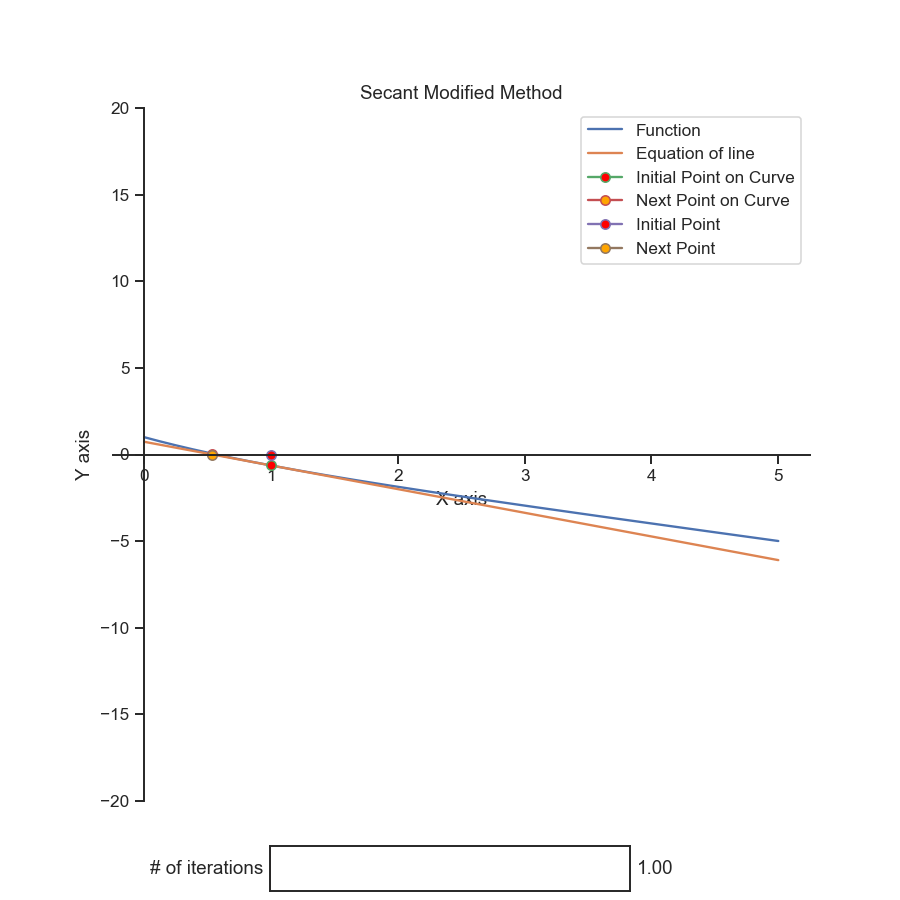

In [23]:



# Plotting settings
# Figure is the "window" of the plot, with size 8 and 8, what is the unit? idk i just change until its nice
fig= plt.figure(figsize=(8,8))

# ax or axes in matlab term is the "plot" or "image" in the figure, so you can have a figure with 8 plots called axes (different from axis)
ax = plt.subplot()

ax.set_ylim([-20,20])
# Spines in matlab term pretty much means like "edge line" or "axis lines" of the plot, so like the "top line, bottom like etc"
#I made the top and right line invisible so we will only have 2 lines which will be the x and y axis
# i set the position of the line to be at 0,0 cuz origin
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Initial Val

initialval = initial
deltaval = deltax*initialval

#This time i want to plot the equation of like so Y = mX + C , where m is gradient and C is y-intercept

# finding y1 so that i can use to find gradient
y0 = equationf(initialval + deltaval)
y1 = equationf(initialval)

newval = initial - (deltaval*initialval*y1)/(y0-y1)

# Finding the gradient here
m = (y0-y1)/(deltaval) # gradient

# Finds the Y-intercept C based on the equation (y1-y2) = m(x1-x2)
# So expanding that equation will get y1 -y2 = m*x1 - m*x2
# Since its y- intercept, x1 = 0
#  y1 = -m*x2 - y2

# Since formula for c from Y = mX + c when X =0 is C = Y
# Therefore C = y1 = -m*X2 - y2
# Math in programming


C = -m*newval

y = m*x + C # Equation of line

# Main Equation Line
line1, = plt.plot(x,equationf(x) ,label="Function")

# This plots the equation of line between the 2 points,
lineeqn, = plt.plot(x, y, label = "Equation of line")

# This plots the XL and Xu point but show them with respect to on the curve so you can see it better
initialpointoncurve,= plt.plot(initialval, equationf(initialval), label="Initial Point on Curve",marker='o', markerfacecolor='red', markersize=6)
nextpointoncurve, = plt.plot(newval, equationf(newval), label="Next Point on Curve",marker='o', markerfacecolor='orange', markersize=6)

# The usual 3 big boi points
firstpoint,= plt.plot(initialval, 0, label="Initial Point",marker='o', markerfacecolor='red', markersize=6)
nextpoint, = plt.plot(newval, 0, label="Next Point", marker='o', markerfacecolor='orange', markersize=6)



# Labels the axis, title and show the legend
plt.title("Secant Modified Method")
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.legend()




# slider functionality
# This create the slider axe, (again remember that an axe is pretty much like a "plot" or "image" on a figure)
# The first 2 numbers are like the where the left and bottom part of the slider starts, so 0.1 and 0.01 so its pretty low
# the last 2 numer is the width and height of the slider
axSlider1 = plt.axes([0.3,0.01,0.4, 0.05])

# this line will turn the axe into an actual slider instead of a blank "plot" or image"
# If you want to icnrease the total number of iteration available change valmax
iterationSlider = Slider(axSlider1, "# of iterations", valmin = 1, valmax = 20, valinit = 1, valstep = 1)



# This is the function that the slider will use when you change the slider value, will be explained later
# What this function do is like what you read in the textbook the f(xl)*f(xu) < 0 and blah blah rule



def newPoint(val):
    iteration = int(iterationSlider.val)
    initialval = initial
    deltaval = deltax*initialval

    y0 = equationf(initialval + deltaval)
    y1 = equationf(initialval)
    newval = initial - (deltaval*initialval*y1)/(y0-y1)
    m = (y0-y1)/(deltaval)
    C = -m*newval
    y = m*x + C
    # Based on the # of iteration you choose, this will do the condition process n times
    # so if you choose 2 iterations, it does the calculation 2 times
    for i in range(1,iteration):
        initialval = newval
        y0 = equationf(initialval + deltaval)
        y1 = equationf(initialval)
        newval = initial - (deltaval*initialval*y1)/(y0-y1)
        m = (y0-y1)/(deltaval)
        C = -m*newval
        y = m*x + C
    # Once everything is done, update the points with the new x values 
    firstpoint.set_xdata(initialval)
    nextpoint.set_xdata(newval)
    # Same thing update the x and y values of the new points
    initialpointoncurve.set_xdata(initialval)
    initialpointoncurve.set_ydata(equationf(initialval))
    nextpointoncurve.set_xdata(newval)
    nextpointoncurve.set_ydata(equationf(newval))
    
    # Update the equation of line with the new equation
    lineeqn.set_ydata(y)
    # Redraw everything
    plt.draw()



# So iterationSlider is what i call my slider object, and the .on_changed() will be what the slider will do when it changed
# the format is like this   sliderName.on_changed(Functiontocall)
# Meaning when i change my slider values, so when it changes, it calls the function newPoint() that i did.
iterationSlider.on_changed(newPoint)

# Finally show all the things, plot, sliders, and etc
plt.show()
